In [141]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import minpy.numpy as np
from minpy.context import gpu

%matplotlib inline

# This work is only for one subject. 

In [4]:
def changeFormat(fPath):
    f = h5py.File(fPath)
    return f

In [5]:
#you can change the path here
f = changeFormat("Dataset/VPsaj.mat")

In [15]:
list(f)

['#refs#', 'cnt', 'mnt', 'mrk']

##  #refs# is used by the h5py reference objects.

## mnt (electrode positions): 

#### ps: not very important, it is just for plotting the position of each electrode.

In [23]:
list(f['mnt'])

['box', 'box_sz', 'clab', 'pos_3d', 'scale_box', 'scale_box_sz', 'x', 'y']

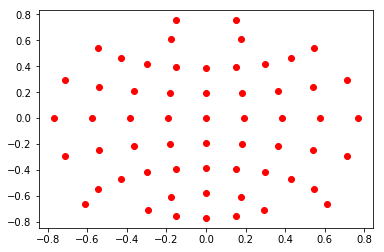

In [147]:
plt.plot(f['mnt']['x'], f['mnt']['y'], 'ro')
plt.show()

## cnt (data):

In [27]:
list(f['cnt'])

['T', 'clab', 'file', 'fs', 'title', 'x']

In [85]:
#unknown yet
#number of samples per each block
f['cnt']['T'][:]

array([[ 539974.],
       [ 539992.],
       [ 539974.]])

###  clab is the electrode names:

In [78]:
#channel labels, it represents th ascii of the chars
f['cnt']['clab']

<HDF5 dataset "clab": shape (69, 1), type "|O">

In [152]:
f['cnt']['clab'][0][0]

<HDF5 object reference>

In [247]:
f[h5py.h5r.get_name(f['cnt']['clab'][58][0], f.id)].value

array([[79],
       [49]], dtype=uint16)

In [6]:
def channel_labels():
    channels = []
    for i in range(69):
        l = len(f[h5py.h5r.get_name(f['cnt']['clab'][i][0], f.id)].value)
        channel = ''
        for j in range(l):
            channel += chr(f[h5py.h5r.get_name(f['cnt']['clab'][i][0], f.id)].value[j])
        #print(str(i) + ', ' + channel)
        channels.append(channel)
    return channels

In [7]:
channels = channel_labels()

In [8]:
df = pd.DataFrame(columns = channels)

In [8]:
df

,EOGv,Fp1,Fp2,AF3,AF4,EOGh,F7,F5,F3,F1,...,Oz,O2,EMGf,lead_gas,lead_brake,dist_to_lead,wheel_X,wheel_Y,gas,brake


### file is just file name:

In [194]:
f['cnt']['file']

<HDF5 dataset "file": shape (9, 1), type "<u2">

In [195]:
file = ''
for i in range(9):
    file += chr(f['cnt']['file'][i])
print(file)

VPsaj.mat


### fs is sampling rate:

In [108]:
f['cnt']['fs'][:]

array([[ 200.]])

### title:

In [190]:
title = ''
for i in range(23):
    title += chr(f['cnt']['title'][i])
print(title)

emergency braking VPsaj


### x is continuous multivariate data:

In [92]:
f['cnt']['x']

<HDF5 dataset "x": shape (69, 1619940), type "<f8">

In [9]:
def dataFrame_fill():
    for i in range(len(df.columns)):
        df[df.columns[i]] = f['cnt']['x'][i]

In [10]:
dataFrame_fill()

In [183]:
#dataframe sample
df[0:4]

,Fp1,Fp2,AF3,AF4,F7,F5,F3,F1,Fz,F2,...,P10,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,y
0,-1.648735,-1.802094,-1.905543,-1.904026,-1.901450,-1.829971,-2.004213,-1.702436,-2.009347,-2.190422,...,-2.108614,-1.910360,-1.557860,-1.809201,-1.442225,-1.597648,-2.059600,-1.460199,-1.774708,-
1,-7.269421,-8.309656,-8.524799,-8.518012,-8.106180,-7.908090,-9.018957,-7.811177,-8.810213,-9.558205,...,-9.438560,-8.043623,-7.010370,-8.141403,-6.303059,-7.289268,-8.924931,-6.205844,-7.986184,-
2,-18.435850,-22.125712,-22.164476,-22.046619,-20.815871,-20.195039,-23.349077,-20.329089,-23.030206,-24.791595,...,-24.399681,-19.606330,-17.986202,-21.006830,-16.345221,-19.271627,-22.913045,-15.879659,-20.941550,-
3,-32.899749,-41.448166,-40.718450,-40.485609,-37.728766,-36.338000,-42.589518,-37.053020,-42.273567,-45.700168,...,-44.280903,-33.682670,-32.573438,-38.495770,-30.233317,-36.246636,-41.706890,-28.656396,-38.925255,-


The sampling rate of the frames from the imulator is 67 Hz

In [30]:
prev = 0
dur = []
for i in range (1619940):
    if (df['dist_to_lead'][i] != 0):
        if (i - prev != 1): 
            dur.append(prev)
            dur.append(i)
            print("prev= " + str(prev) + "   i= " + str(i) + "    diff = " + str(i - prev))
        prev = i

prev= 0   i= 9337    diff = 9337
prev= 46545   i= 46549    diff = 4
prev= 539973   i= 549351    diff = 9378
prev= 858679   i= 858683    diff = 4
prev= 1072309   i= 1072313    diff = 4
prev= 1072327   i= 1072344    diff = 17
prev= 1079965   i= 1089344    diff = 9379


In [15]:
df[9337:9338]

,EOGv,Fp1,Fp2,AF3,AF4,EOGh,F7,F5,F3,F1,...,Oz,O2,EMGf,lead_gas,lead_brake,dist_to_lead,wheel_X,wheel_Y,gas,brake
9337,33.384904,5.620686,19.823036,9.7283,22.748102,-10.424508,28.321594,22.809284,-14.730963,24.735394,...,15.697134,60.754159,0.878467,0.14296,0.0,-9.552266,0.0,0.0,0.0,-0.000022


In [16]:
df.shape

(1619940, 69)

## mrk (braking event):

In [197]:
list(f['mrk'])

['className', 'event', 'time', 'y']

### ClassName:

In [203]:
f['mrk']['className'][0][0]

<HDF5 object reference>

In [62]:
def events():
    eventsList = []
    for i in range(5):
        l = len(f[h5py.h5r.get_name(f['mrk']['className'][i][0], f.id)].value)
        event = ''
        for j in range(l):
            event += chr(f[h5py.h5r.get_name(f['mrk']['className'][i][0], f.id)].value[j])
        print(str(i) + ', ' + event)
        eventsList.append(event)
    return eventsList

In [63]:
eventsList = events()

0, car_normal
1, car_brake
2, car_hold
3, car_collision
4, react_emg


### event: the time between car_brake and react_emg

In [76]:
f['mrk']['event']['react']

<HDF5 dataset "react": shape (1, 1146), type "<f8">

In [129]:
#this fn calculates how many times the user responded to the emergency event and avg response time
def calcNumberOfReacts():
    cnt = 0.0
    s = 0.0
    for i in range(1146):
        if (f['mrk']['event']['react'][0][i] >=0):
            cnt += 1
            s += f['mrk']['event']['react'][0][i]
    print("numebr of response times= " + str(cnt))
    print("avg of response time= " + str(s/cnt) + " ms")

In [130]:
calcNumberOfReacts()

numebr of response times= 219.0
avg of response time= 516.164383562 ms


### time: timestamp for each event in milliseconds

In [115]:
f['mrk']['time'][0:2] #5294, 5365

array([[ 26470.],
       [ 26825.]])

### y: binary matrix telling which of the five types each event is

In [24]:
f['mrk']['y']

<HDF5 dataset "y": shape (1146, 5), type "<f8">

In [58]:
f['mrk']['y'][0:4]

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [64]:
def addEvents():
    y = ['-']*(1619940)
    for i in range(f['mrk']['y'].shape[0]):
        t = int(f['mrk']['time'][i]*(0.2))
        evIndex = np.where(f['mrk']['y'][i] == 1)[0][0]
        y[t] = (eventsList[evIndex])
    return y

In [65]:
y = addEvents()

In [66]:
df['y'] = y

cols = [0, 5, 61, 62, 63, 64, 65, 66, 67, 68]
df.drop(df.columns[cols], axis=1, inplace=True)

In [69]:
df[0:4]

,Fp1,Fp2,AF3,AF4,F7,F5,F3,F1,Fz,F2,...,P10,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,y
0,-1.648735,-1.802094,-1.905543,-1.904026,-1.901450,-1.829971,-2.004213,-1.702436,-2.009347,-2.190422,...,-2.108614,-1.910360,-1.557860,-1.809201,-1.442225,-1.597648,-2.059600,-1.460199,-1.774708,-
1,-7.269421,-8.309656,-8.524799,-8.518012,-8.106180,-7.908090,-9.018957,-7.811177,-8.810213,-9.558205,...,-9.438560,-8.043623,-7.010370,-8.141403,-6.303059,-7.289268,-8.924931,-6.205844,-7.986184,-
2,-18.435850,-22.125712,-22.164476,-22.046619,-20.815871,-20.195039,-23.349077,-20.329089,-23.030206,-24.791595,...,-24.399681,-19.606330,-17.986202,-21.006830,-16.345221,-19.271627,-22.913045,-15.879659,-20.941550,-
3,-32.899749,-41.448166,-40.718450,-40.485609,-37.728766,-36.338000,-42.589518,-37.053020,-42.273567,-45.700168,...,-44.280903,-33.682670,-32.573438,-38.495770,-30.233317,-36.246636,-41.706890,-28.656396,-38.925255,-


### Selected electrodes:

In [138]:
#avg of all events was taken
def drawElectodeBehav(e):
    brake_signals = np.zeros(300)
    no_brake_signals = np.zeros(300)
    cnt = 0
    for i in range (1146):
        if(f['mrk']['y'][i][4] == 1):
            car_brake = int((f['mrk']['time'][i] - f['mrk']['event']['react'][0][i])*0.2)
            brake_signals += f['cnt']['x'][e][car_brake:car_brake+300]
            no_brake_signals += f['cnt']['x'][e][car_brake+600:car_brake+900]
            cnt += 1
            mean_brake = brake_signals / cnt
            mean_no_brake = no_brake_signals / cnt
            print(i)
    return mean_brake, mean_no_brake

1


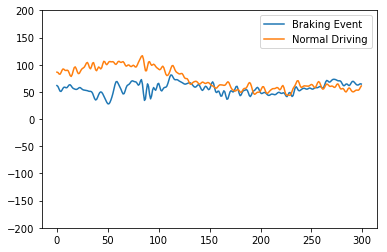

6


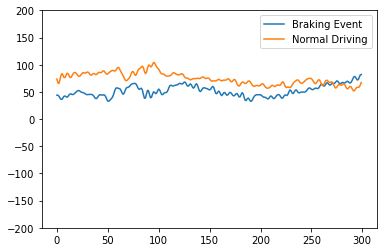

12


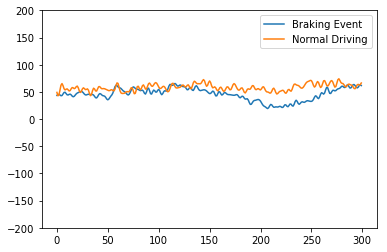

32


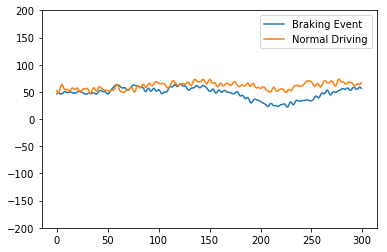

35


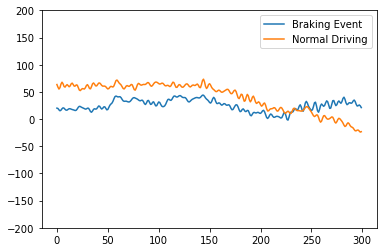

55


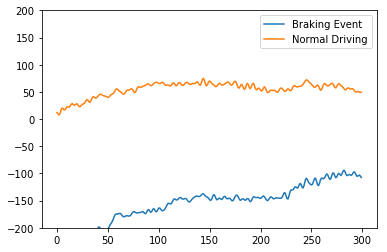

60


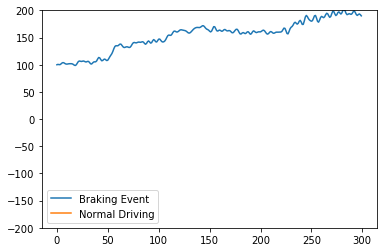

64


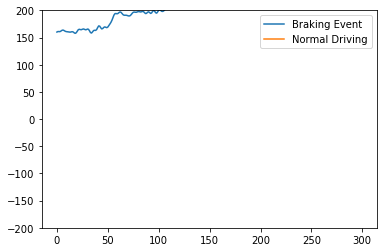

68


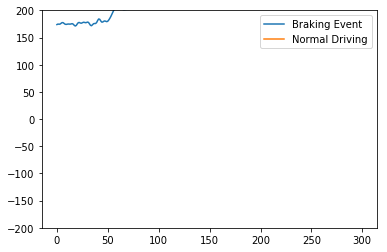

71


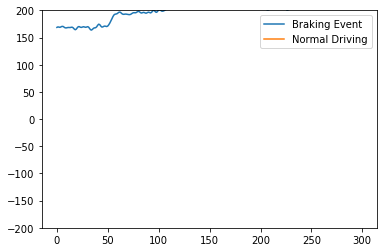

76


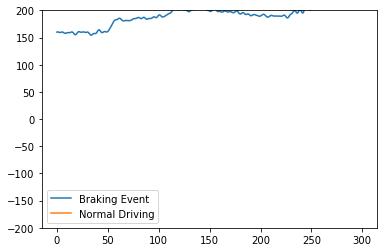

79


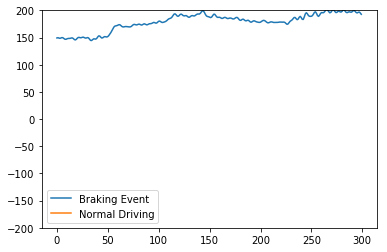

84


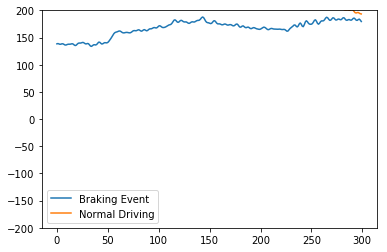

88


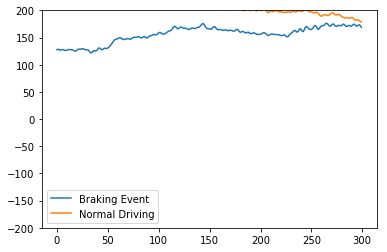

92


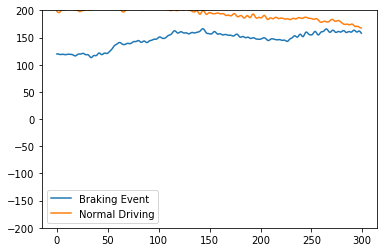

96


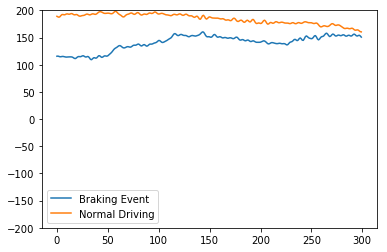

100


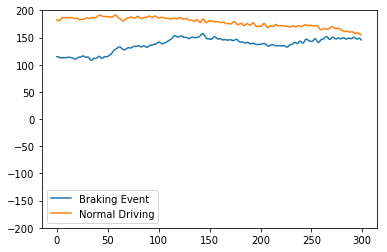

103


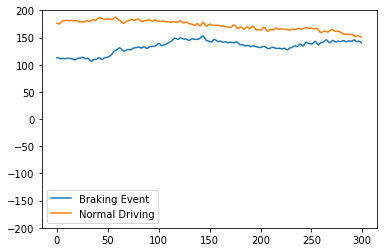

108


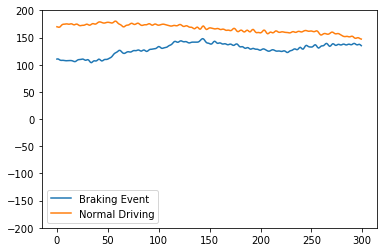

112


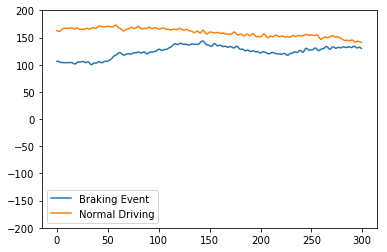

116


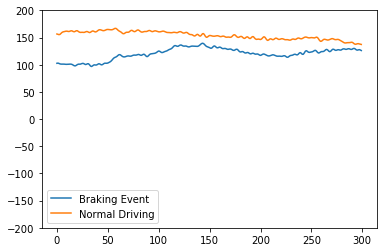

120


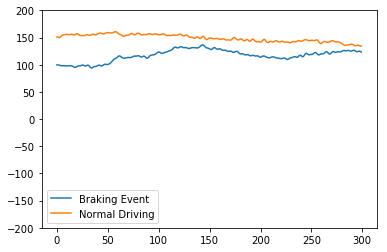

123


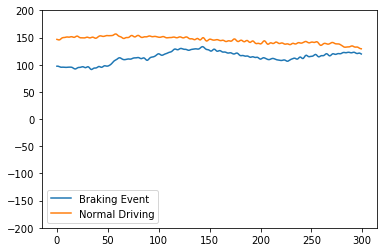

127


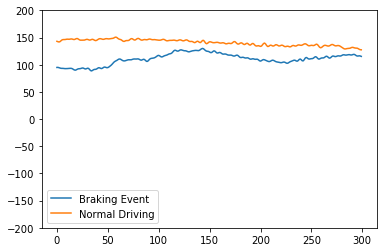

132


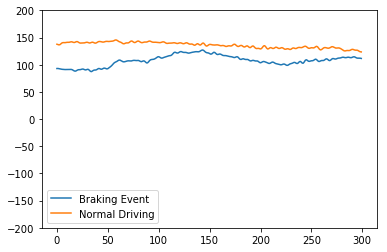

136


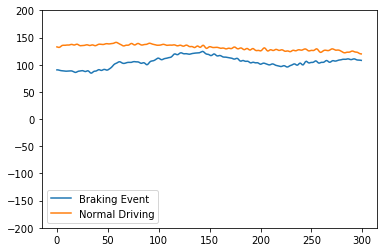

140


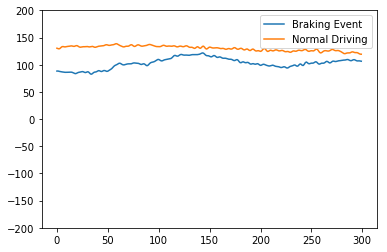

144


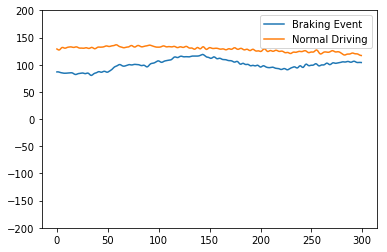

147


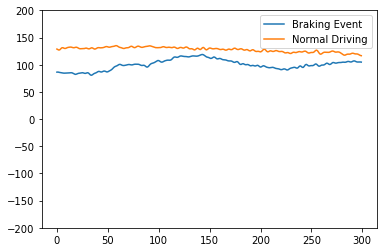

152


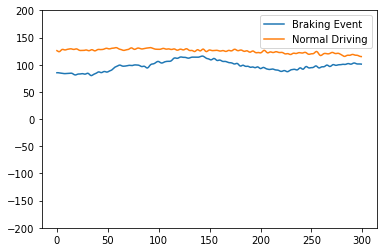

156


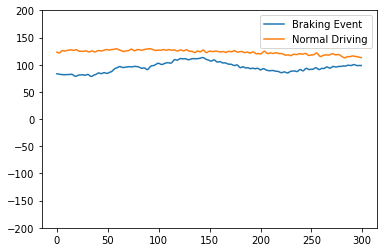

159


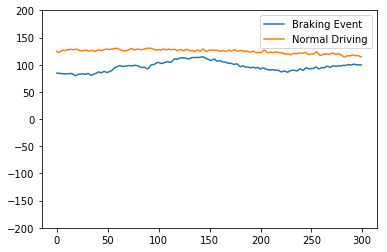

164


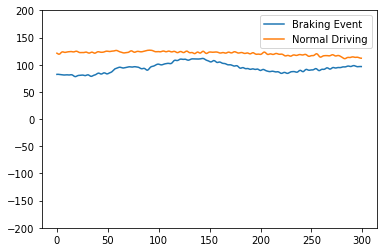

168


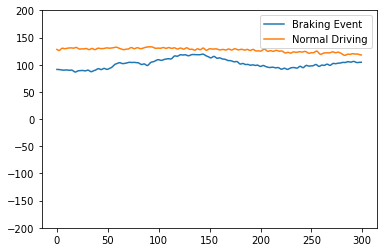

172


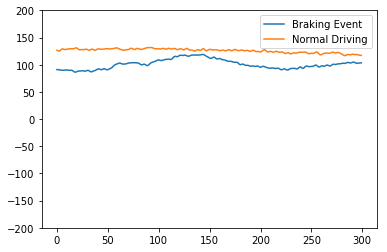

176


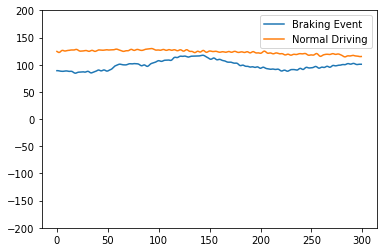

180


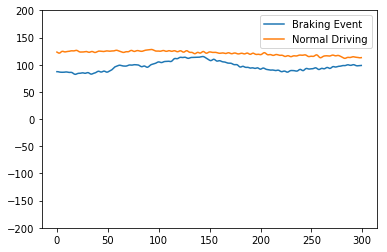

184


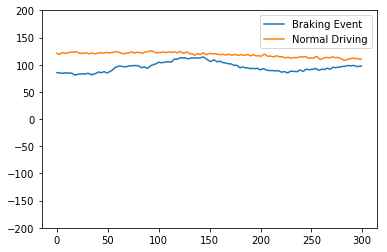

188


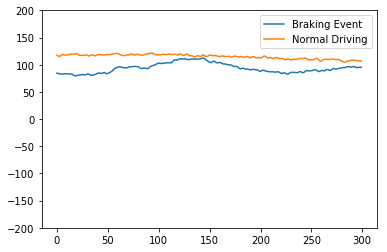

191


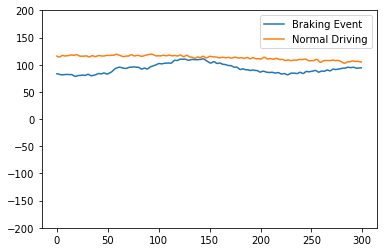

202


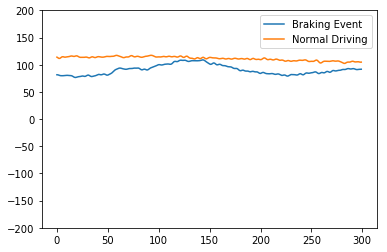

206


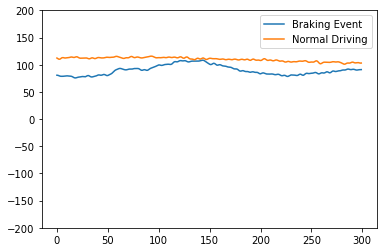

210


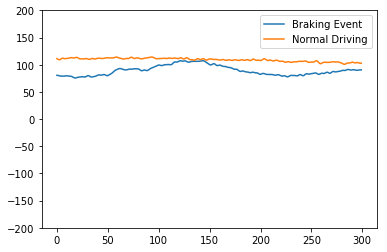

214


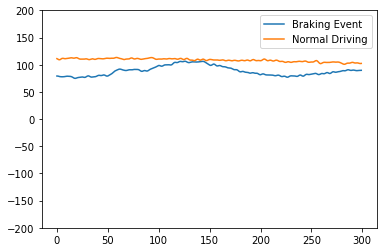

218


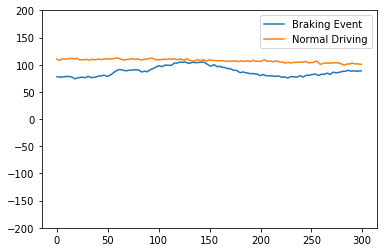

222


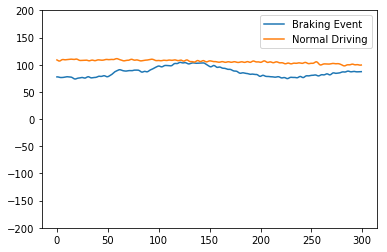

225


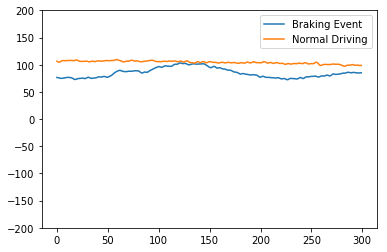

242


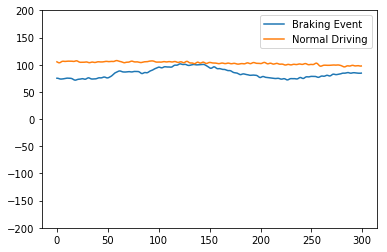

246


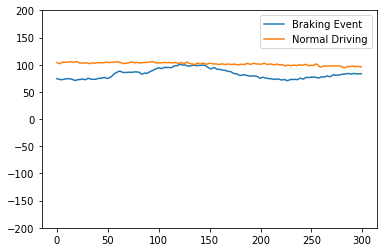

250


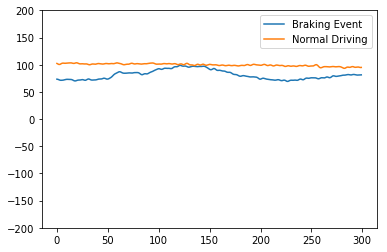

254


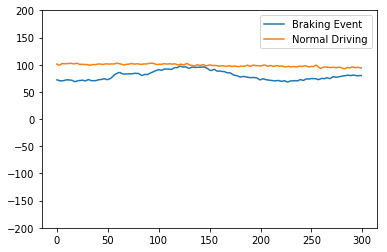

258


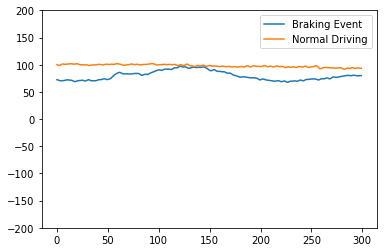

264


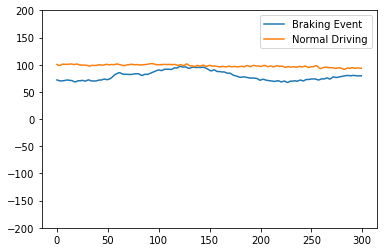

269


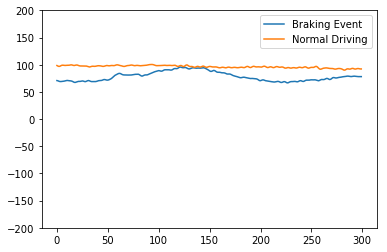

273


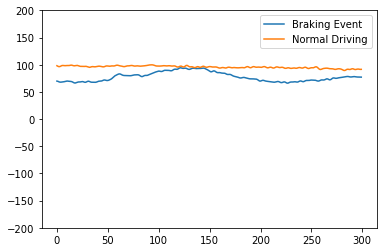

276


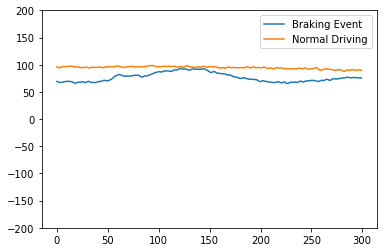

280


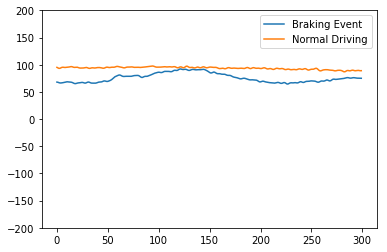

284


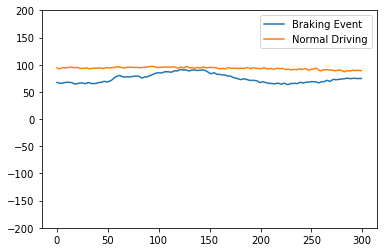

302


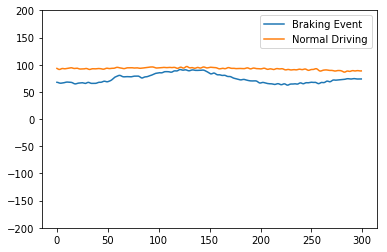

322


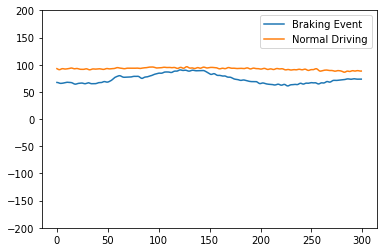

326


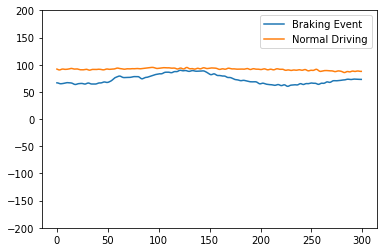

330


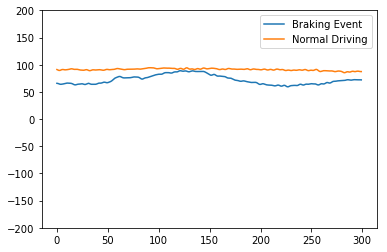

334


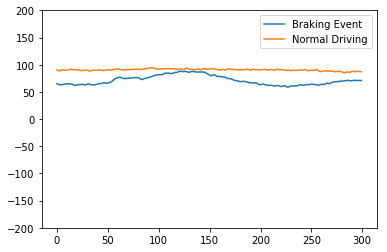

338


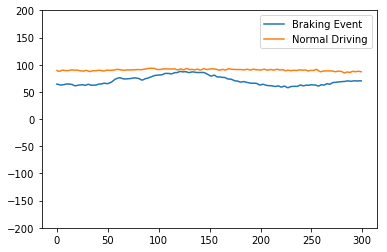

341


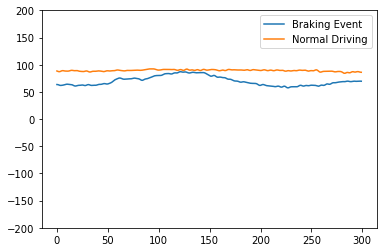

346


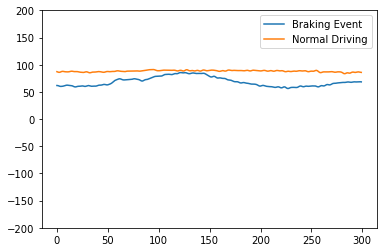

350


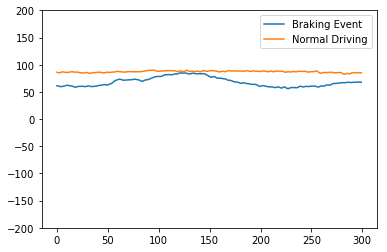

353


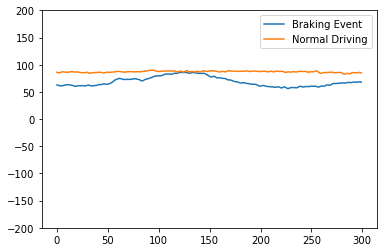

357


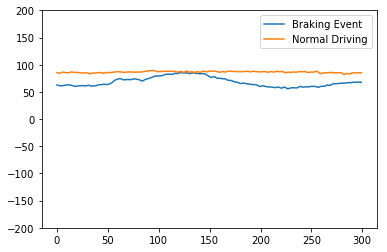

362


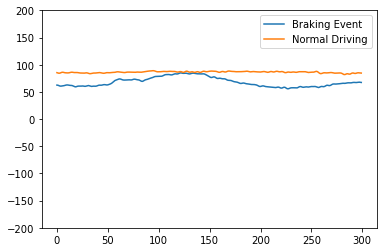

366


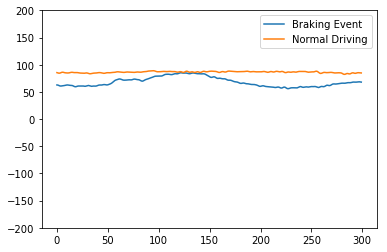

370


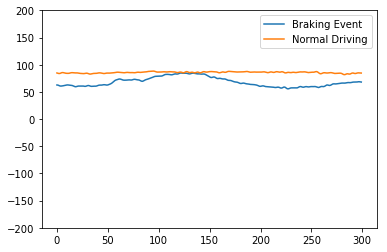

374


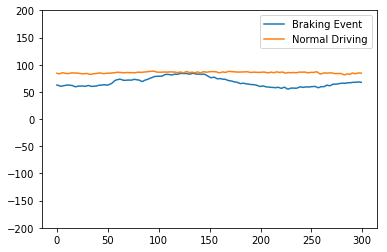

378


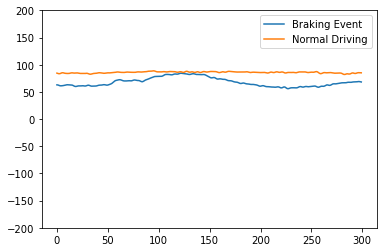

381


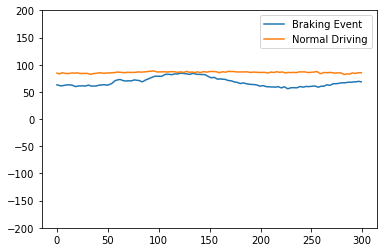

386


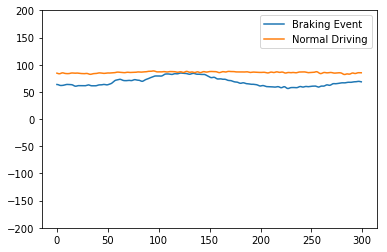

390


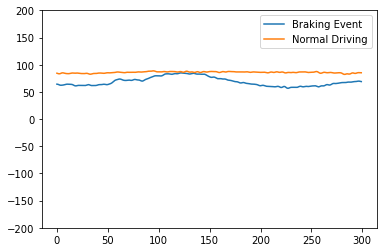

394


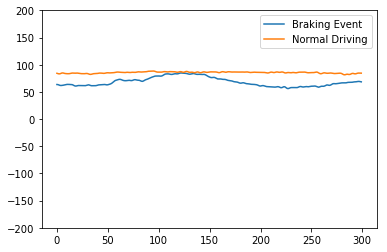

398


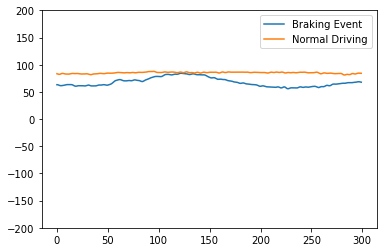

402


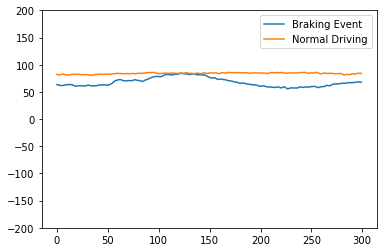

406


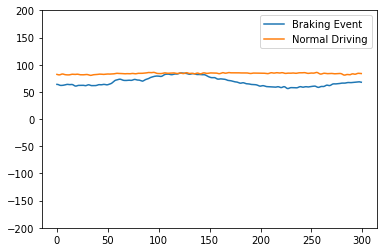

409


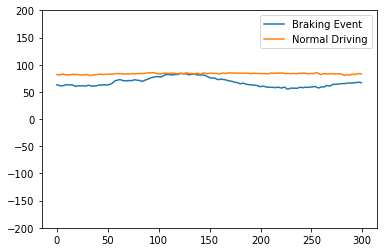

428


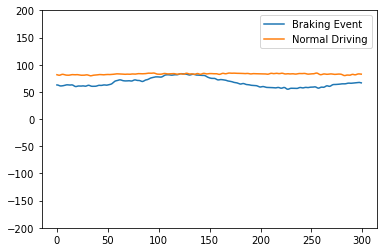

433


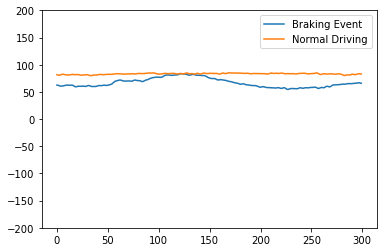

454


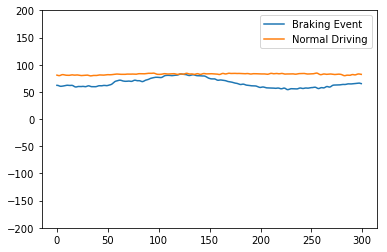

458


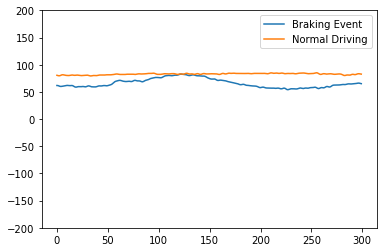

462


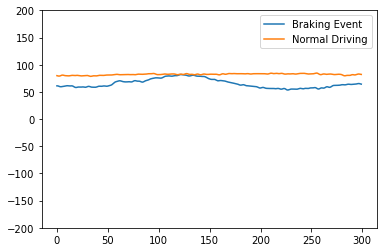

465


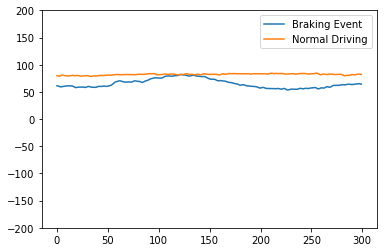

470


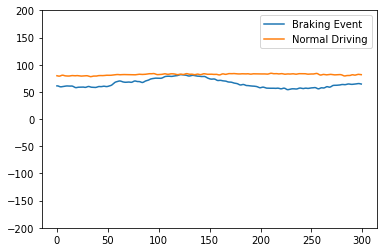

473


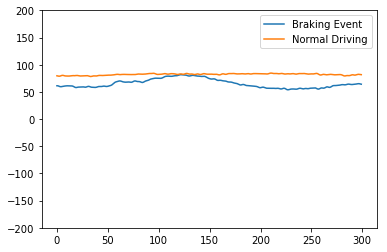

478


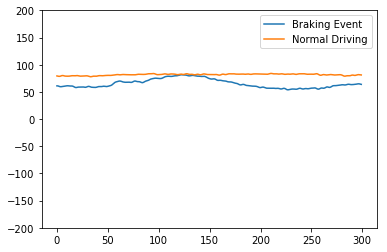

481


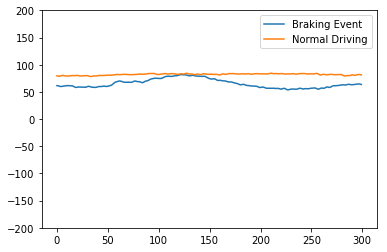

485


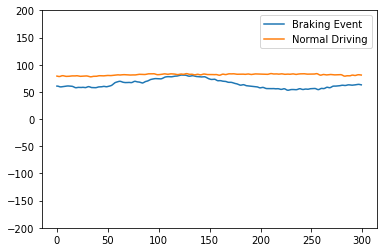

490


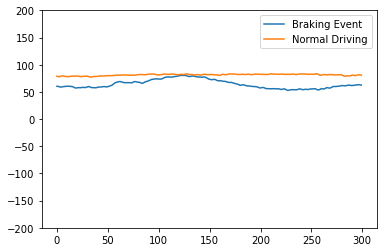

494


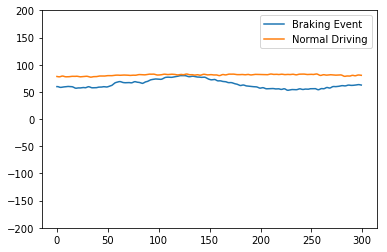

497


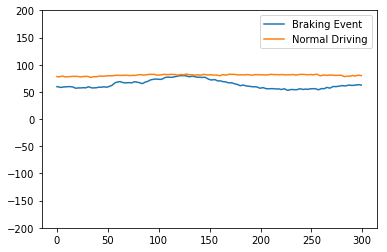

502


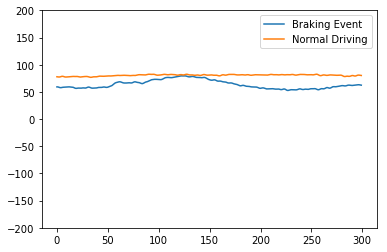

506


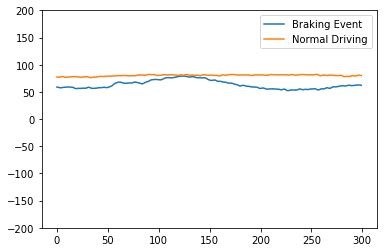

510


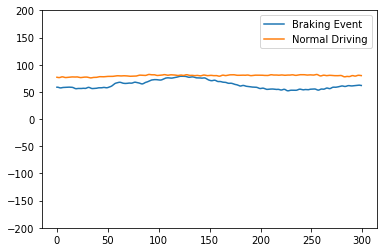

514


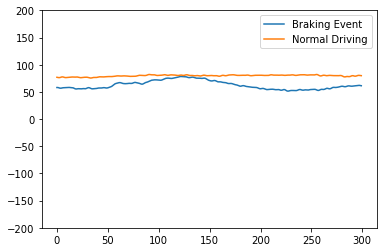

518


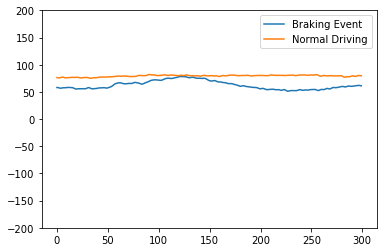

522


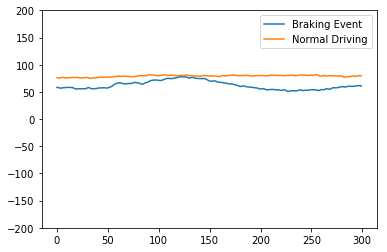

528


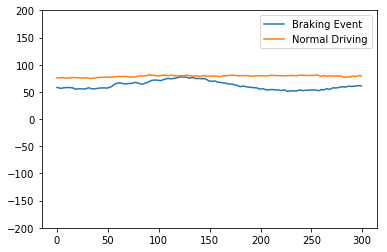

535


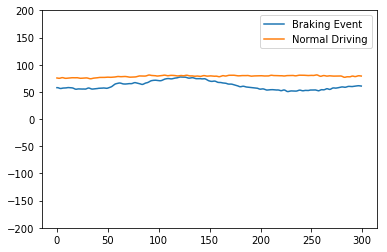

540


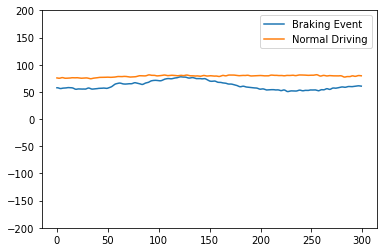

544


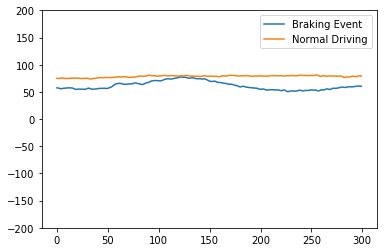

548


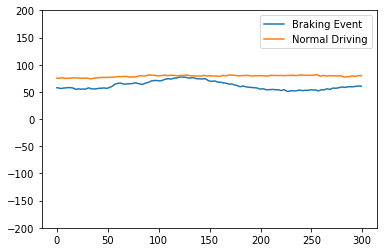

551


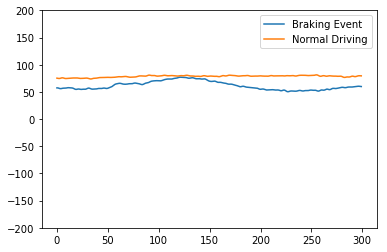

556


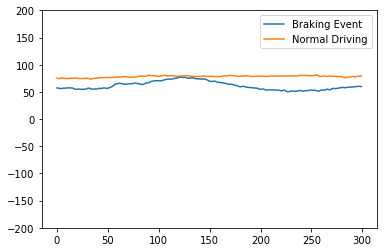

560


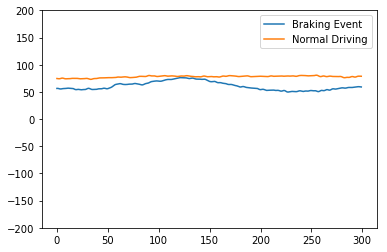

563


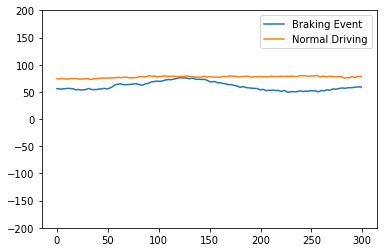

568


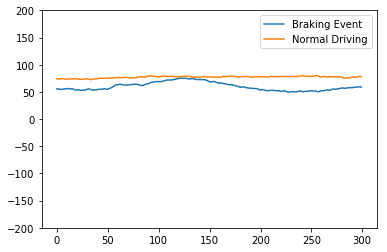

572


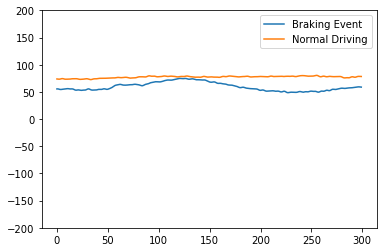

587


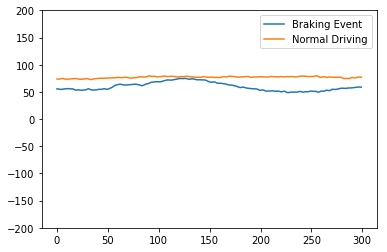

592


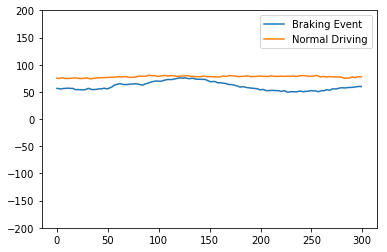

598


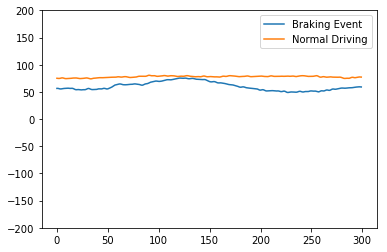

602


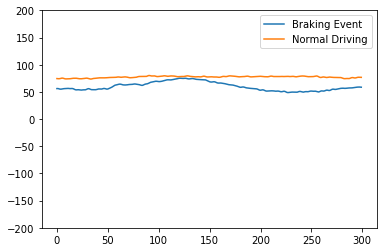

610


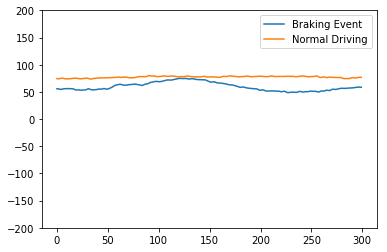

613


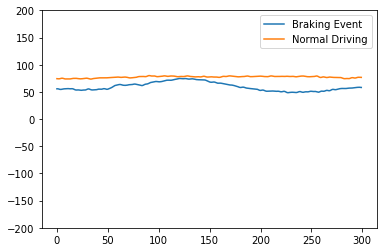

618


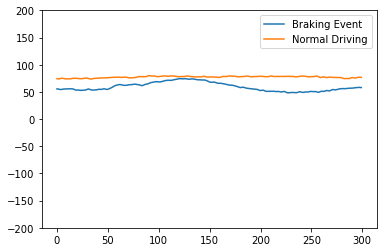

621


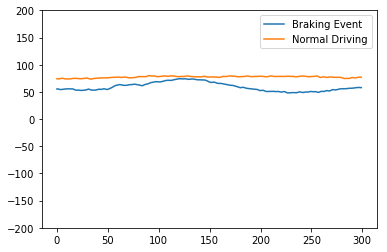

626


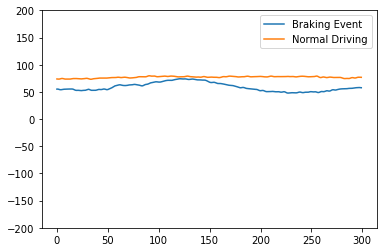

630


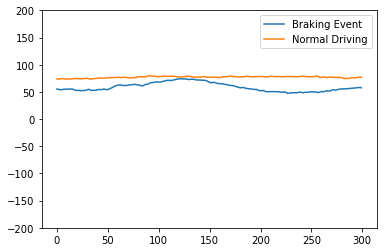

633


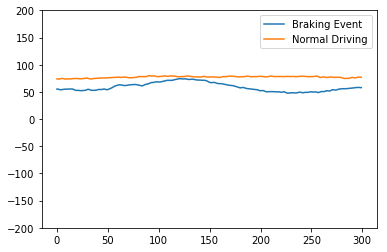

637


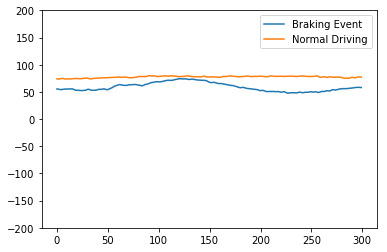

642


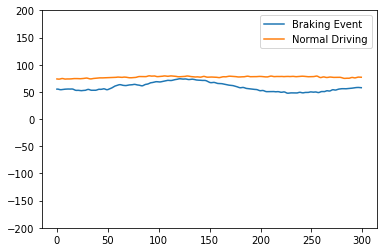

646


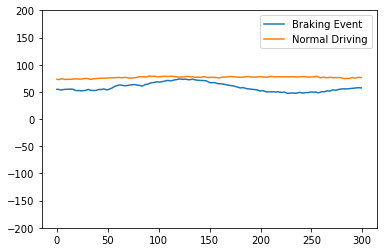

650


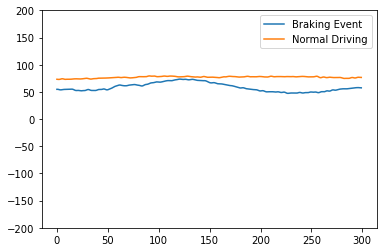

654


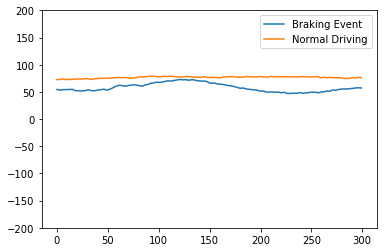

658


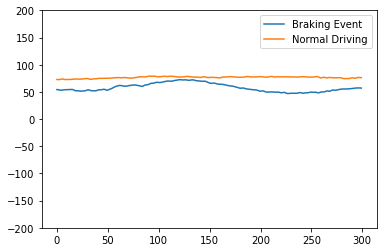

662


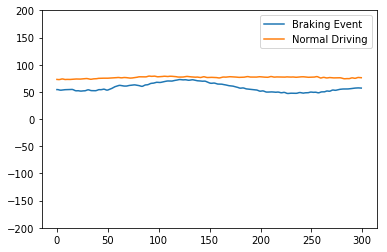

665


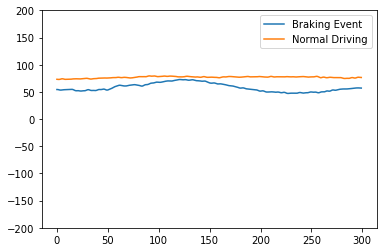

669


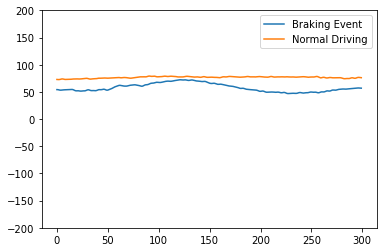

688


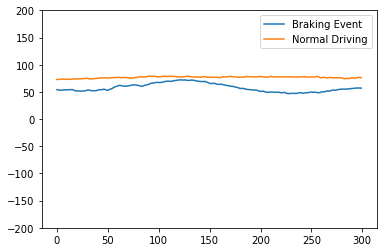

692


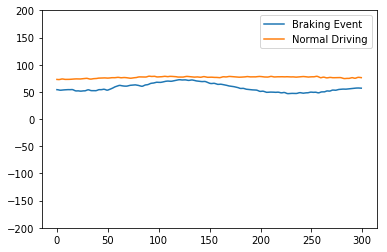

697


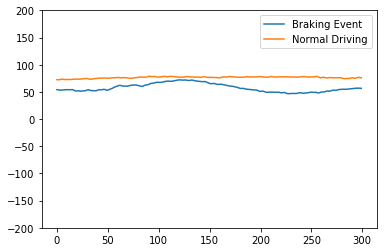

701


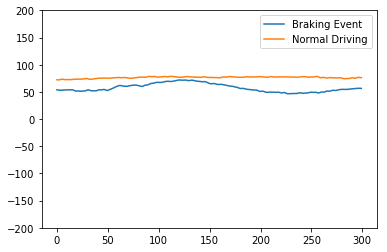

705


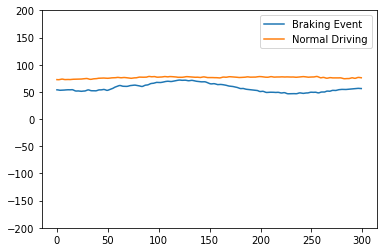

709


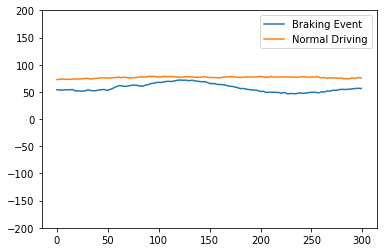

729


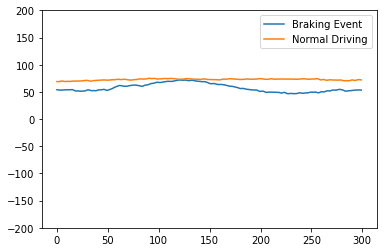

732


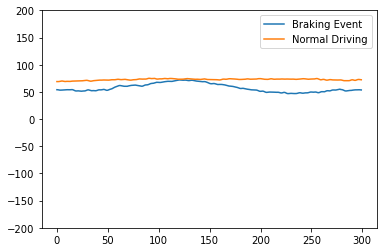

736


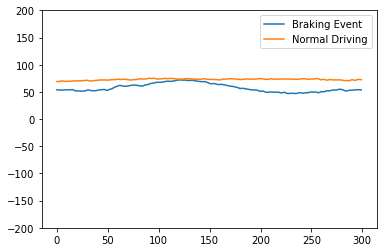

739


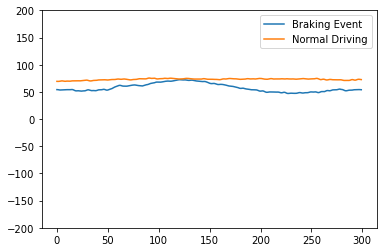

744


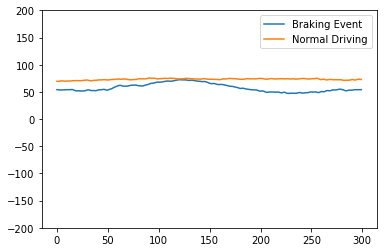

748


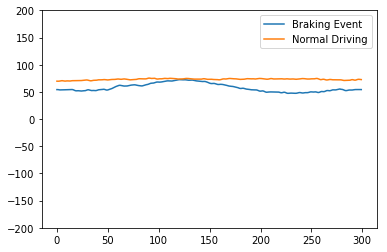

751


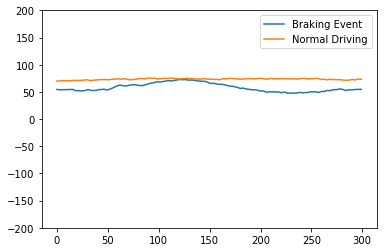

756


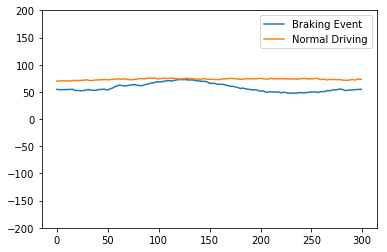

760


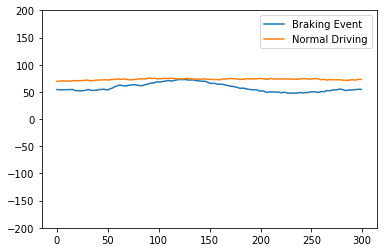

764


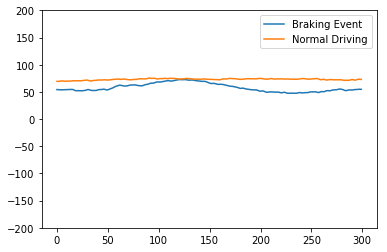

768


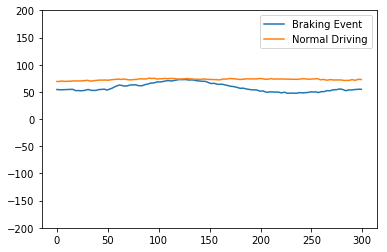

772


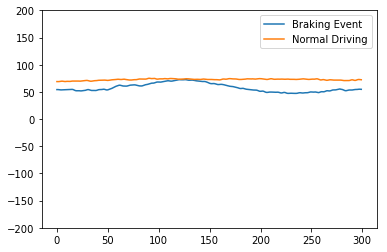

776


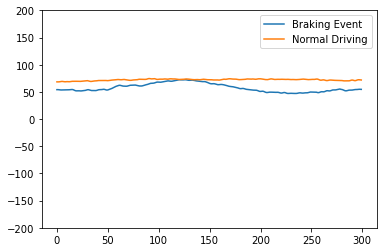

780


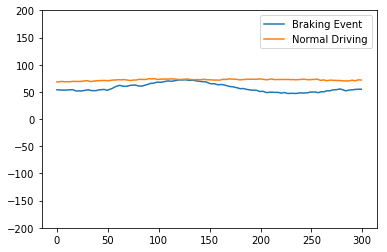

783


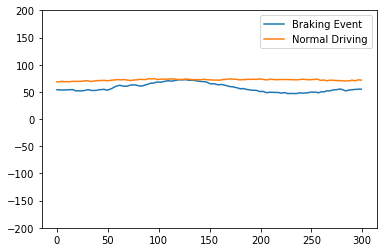

788


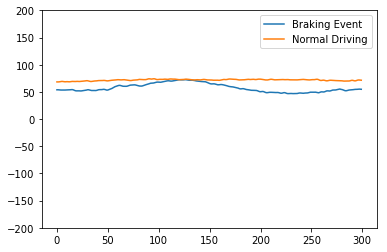

791


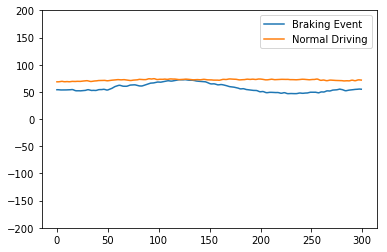

796


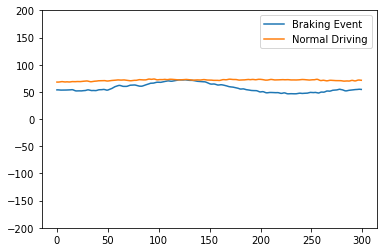

800


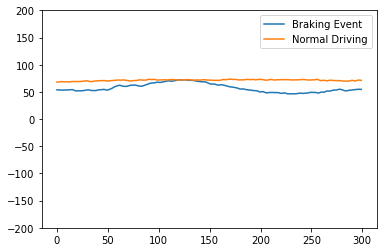

804


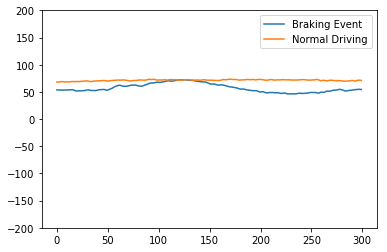

808


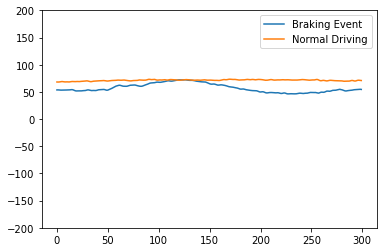

811


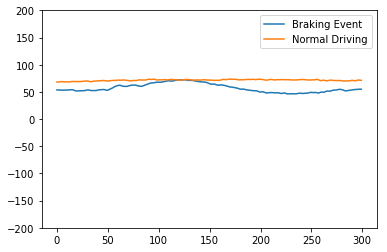

816


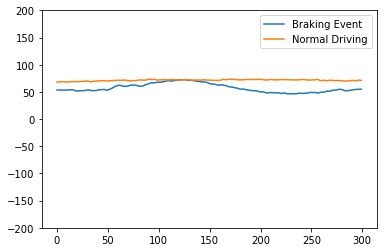

819


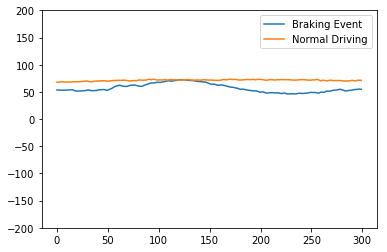

824


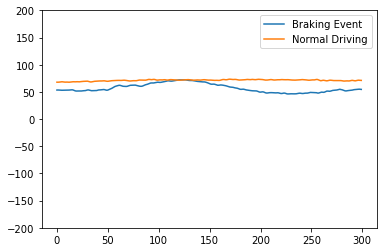

828


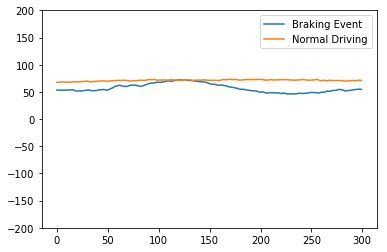

832


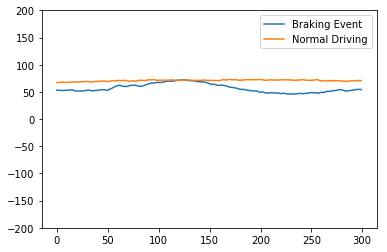

836


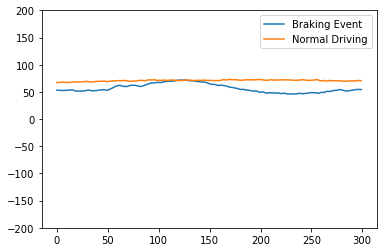

839


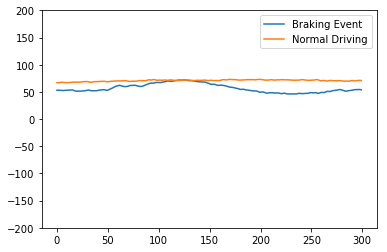

844


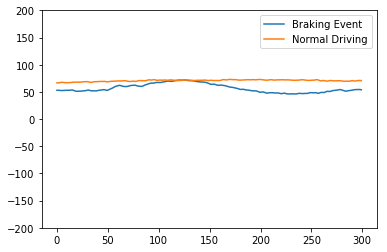

847


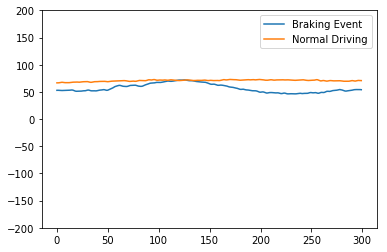

851


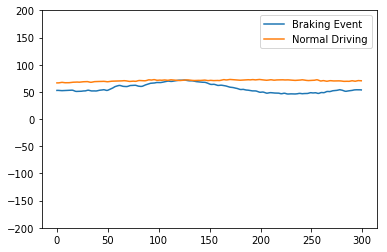

870


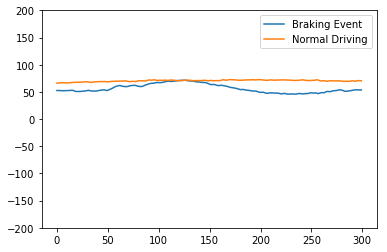

874


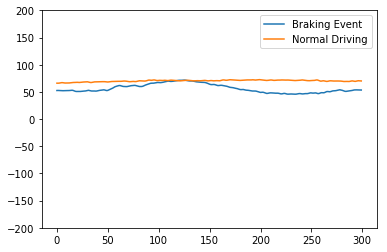

878


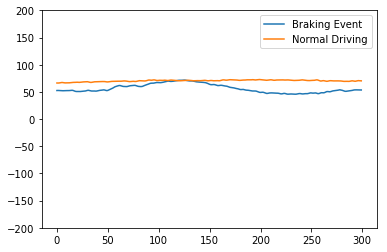

896


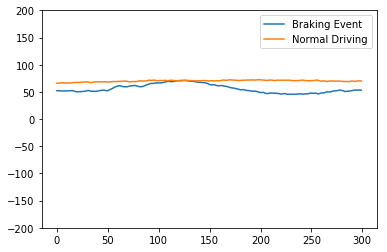

899


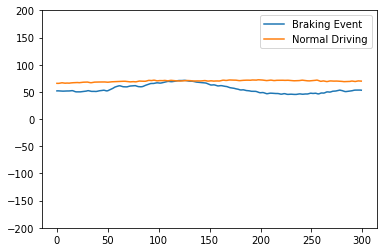

904


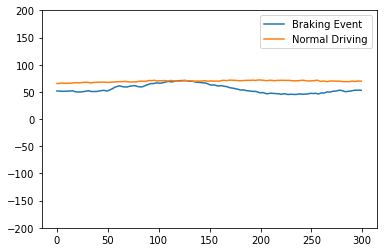

908


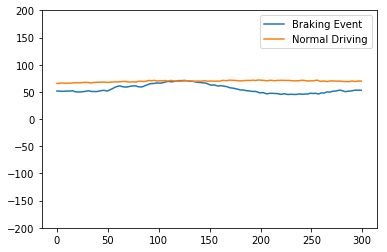

911


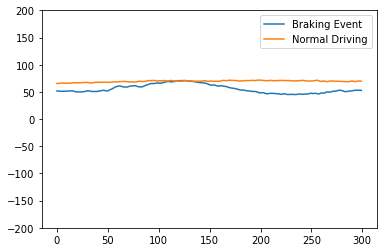

916


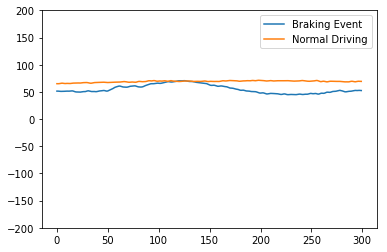

928


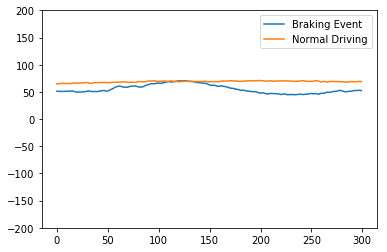

932


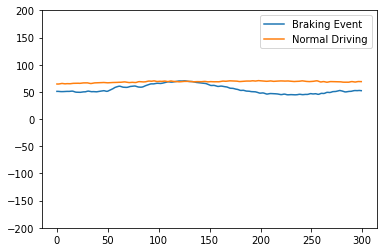

937


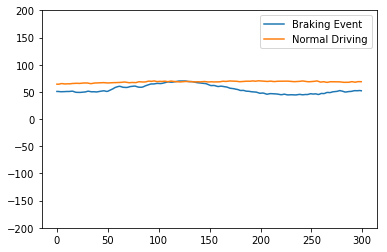

941


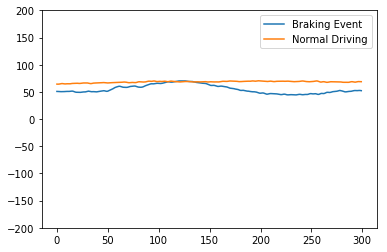

944


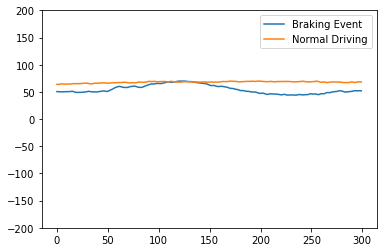

948


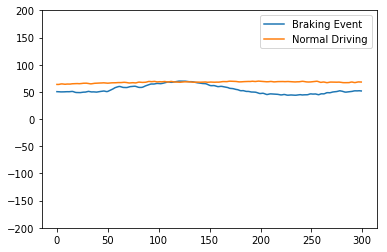

953


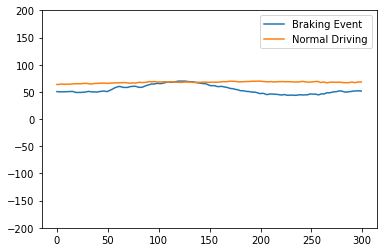

957


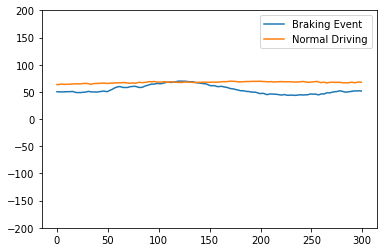

961


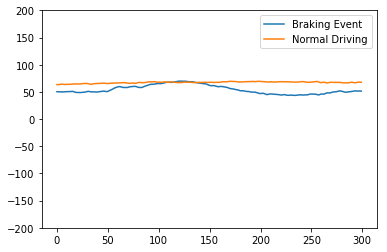

964


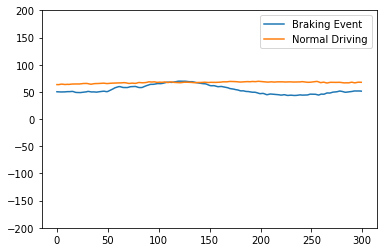

967


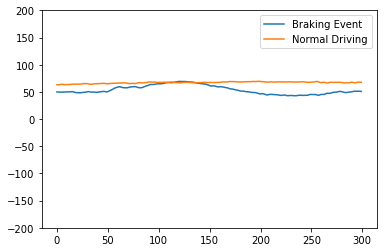

984


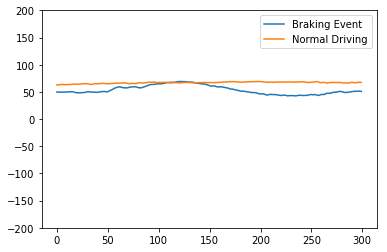

988


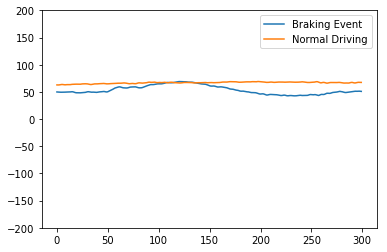

992


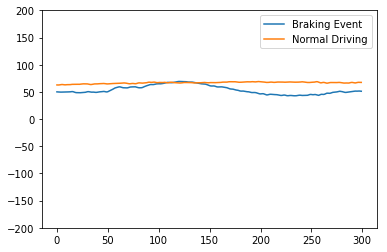

997


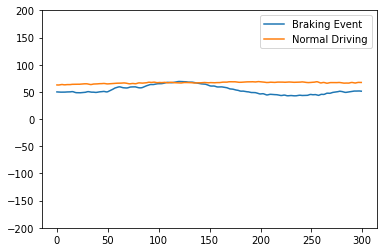

1001


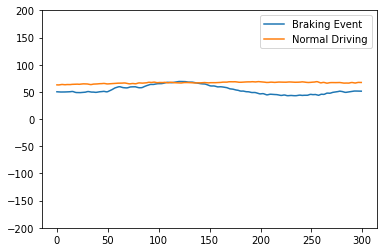

1004


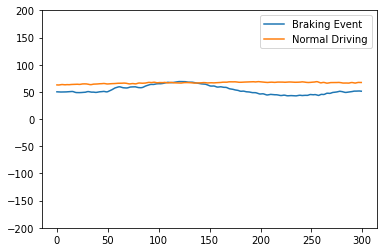

1022


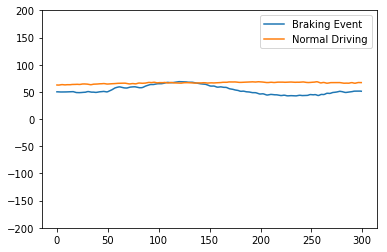

1026


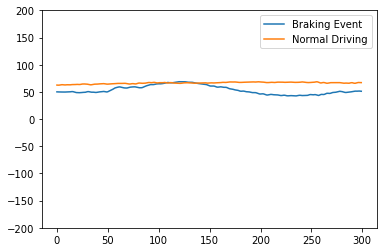

1030


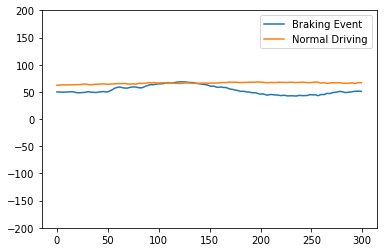

1034


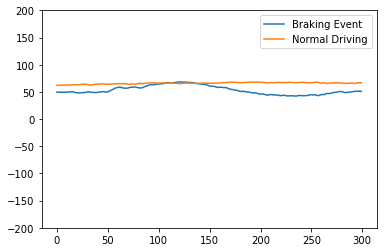

1038


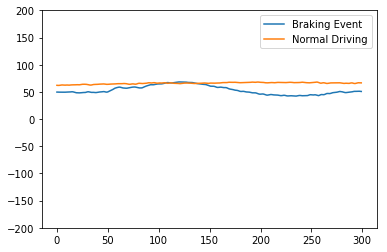

1041


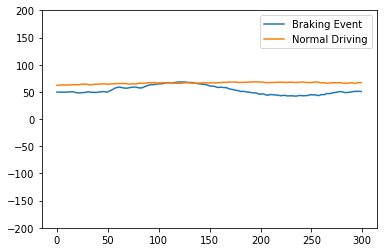

1061


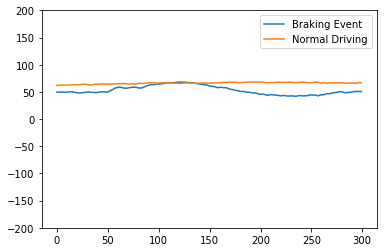

1078


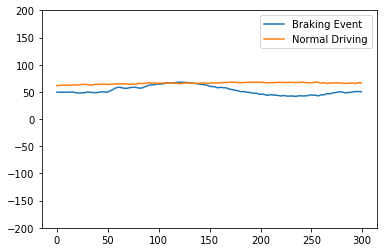

1081


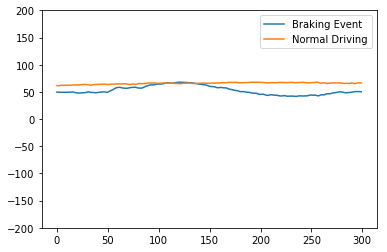

1086


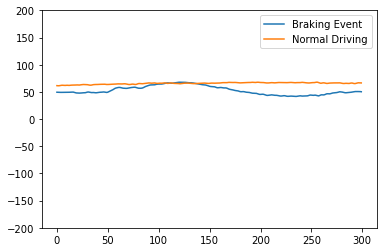

1089


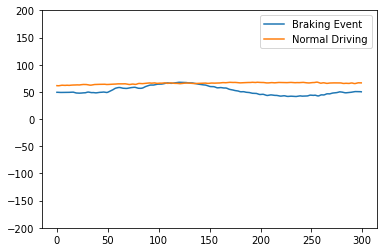

1094


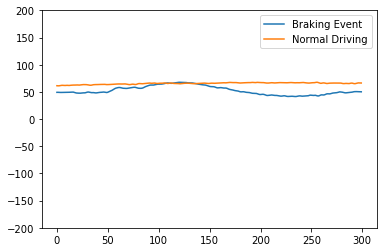

1098


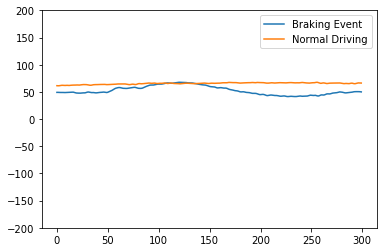

1102


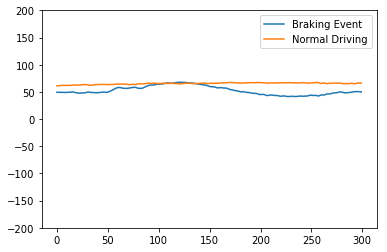

1106


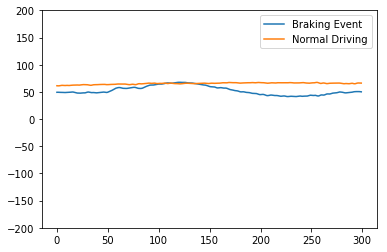

1109


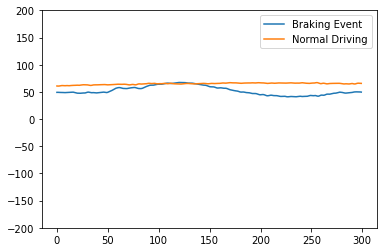

1114


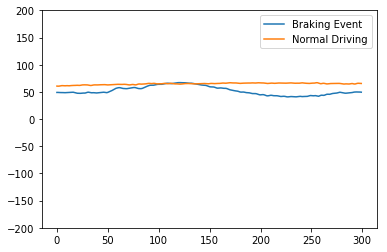

1118


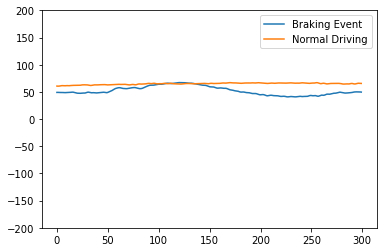

1122


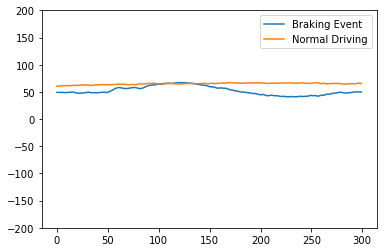

1125


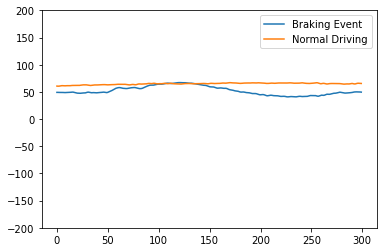

1139


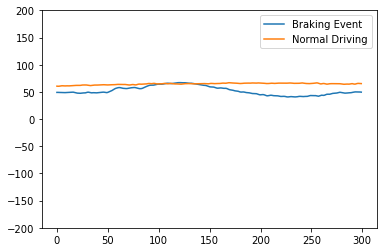

1144


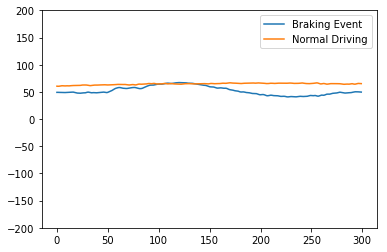

In [121]:
 mean_brake, mean_no_brake = drawElectodeBehav(47)

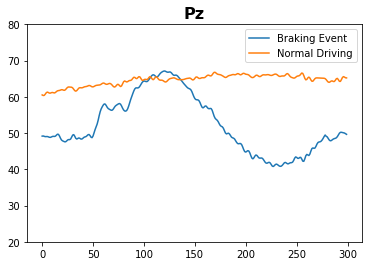

In [176]:
plt.ylim(20, 80)
plt.title("Pz", fontsize=16, fontweight='bold')
plt.plot(mean_brake, label="Braking Event")
plt.plot(mean_no_brake, label="Normal Driving")
plt.legend()
plt.show()

In [144]:
with gpu(0):
    mean_brake_F3, mean_no_brake_F3 = drawElectodeBehav(8)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


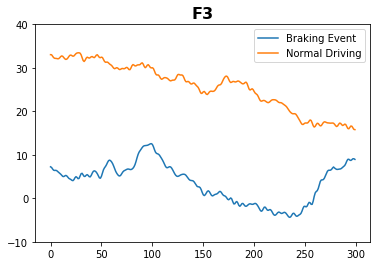

In [175]:
plt.ylim(-10, 40)
plt.title("F3", fontsize=16, fontweight='bold')
plt.plot(mean_brake_F3.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_F3.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [149]:
with gpu(0):
    mean_brake_O2, mean_no_brake_O2 = drawElectodeBehav(60)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


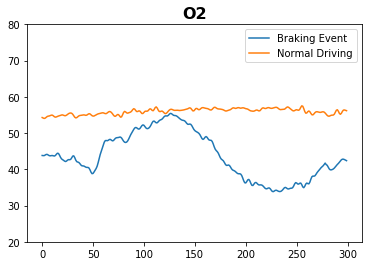

In [177]:
plt.ylim(20, 80)
plt.title("O2", fontsize=16, fontweight='bold')
plt.plot(mean_brake_O2.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_O2.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [150]:
with gpu(0):
    mean_brake_Oz, mean_no_brake_OZ = drawElectodeBehav(59)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


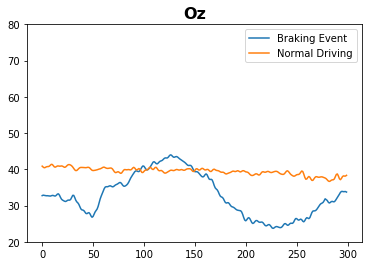

In [178]:
plt.ylim(20, 80)
plt.title("Oz", fontsize=16, fontweight='bold')
plt.plot(mean_brake_Oz.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_OZ.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [151]:
with gpu(0):
    mean_brake_CP3, mean_no_brake_CP3 = drawElectodeBehav(35)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


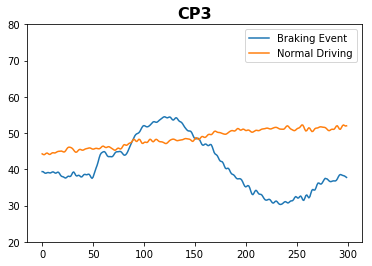

In [179]:
plt.ylim(20, 80)
plt.title("CP3", fontsize=16, fontweight='bold')
plt.plot(mean_brake_CP3.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_CP3.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [152]:
with gpu(0):
    mean_brake_P7, mean_no_brake_P7 = drawElectodeBehav(43)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


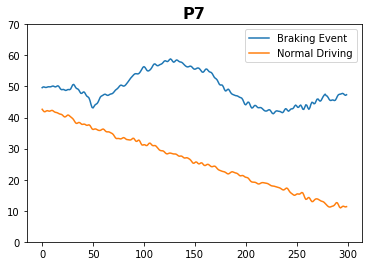

In [180]:
plt.ylim(0, 70)
plt.title("P7", fontsize=16, fontweight='bold')
plt.plot(mean_brake_P7.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_P7.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [153]:
with gpu(0):
    mean_brake_P8, mean_no_brake_P8 = drawElectodeBehav(51)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


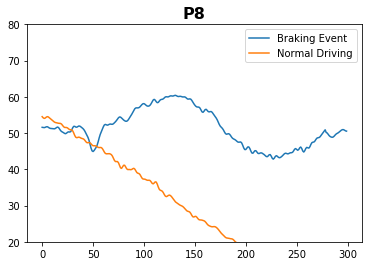

In [181]:
plt.ylim(20, 80)
plt.title("P8", fontsize=16, fontweight='bold')
plt.plot(mean_brake_P8.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_P8.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [154]:
with gpu(0):
    mean_brake_O1, mean_no_brake_O1 = drawElectodeBehav(58)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


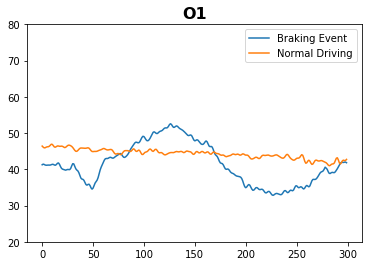

In [182]:
plt.ylim(20, 80)
plt.title("O1", fontsize=16, fontweight='bold')
plt.plot(mean_brake_O1.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_O1.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [186]:
with gpu(0):
    mean_brake_F4, mean_no_brake_F4 = drawElectodeBehav(12)

1
6
12
32
35
55
60
64
68
71
76
79
84
88
92
96
100
103
108
112
116
120
123
127
132
136
140
144
147
152
156
159
164
168
172
176
180
184
188
191
202
206
210
214
218
222
225
242
246
250
254
258
264
269
273
276
280
284
302
322
326
330
334
338
341
346
350
353
357
362
366
370
374
378
381
386
390
394
398
402
406
409
428
433
454
458
462
465
470
473
478
481
485
490
494
497
502
506
510
514
518
522
528
535
540
544
548
551
556
560
563
568
572
587
592
598
602
610
613
618
621
626
630
633
637
642
646
650
654
658
662
665
669
688
692
697
701
705
709
729
732
736
739
744
748
751
756
760
764
768
772
776
780
783
788
791
796
800
804
808
811
816
819
824
828
832
836
839
844
847
851
870
874
878
896
899
904
908
911
916
928
932
937
941
944
948
953
957
961
964
967
984
988
992
997
1001
1004
1022
1026
1030
1034
1038
1041
1061
1078
1081
1086
1089
1094
1098
1102
1106
1109
1114
1118
1122
1125
1139
1144


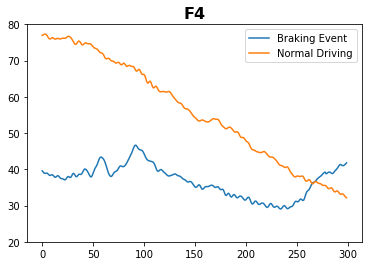

In [187]:
plt.ylim(20, 80)
plt.title("F4", fontsize=16, fontweight='bold')
plt.plot(mean_brake_F4.asnumpy(), label="Braking Event")
plt.plot(mean_no_brake_F4.asnumpy(), label="Normal Driving")
plt.legend()
plt.show()

In [188]:
def checkTimeDiff():
    for i in range (1146):
        if(f['mrk']['y'][i][4] == 1):
            start = int((f['mrk']['time'][i] - f['mrk']['event']['react'][0][i]))
            for j in range (i, 1146):
                 if(f['mrk']['y'][j][1] == 1):
                    print("diff = " + str(f['mrk']['time'][j]- start))
                    break